<a href="https://colab.research.google.com/github/nathalianetto/ANALYSIS_OF_CS_GO_PROFESSIONAL_MATCHES/blob/main/ANALYSIS_OF_CS_GO_PROFESSIONAL_MATCHES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALYSIS OF CS:GO PROFESSIONAL MATCHES**

**Data source:** 

https://www.kaggle.com/mateusdmachado/csgo-professional-matches/code

**About the game:**

Counter-Strike is a FPS (First-Person Shooter) game in which two teams of 5 players face each other in a matchup. The game retains the same gameplay concepts since its first version, which include a Terrorist side (TR) that is tasked to plant a bomb and have it detonate, and a Counter-Terrorist side (CT) that is tasked to defuse the bomb or prevent it from being planted. Both teams can also win a round by eliminating all players on the opposing team before the bomb is planted.

A standard game of Counter-Strike is a best of 30 rounds, the winning team being the first to win 16 rounds. The 30 rounds are played in two halves of 15 on each side of the map, with a round time limit of 1 minute 55 seconds, plus 40 seconds after the bomb is planted.

In case both teams draw at the 30th round on 15x15, 6 more rounds are added-on, which constitutes overtime. The overtime ends if a team wins 4 out of 6 rounds. If both teams win 3 rounds in overtime, another overtime of 6 rounds is played, and the process might repeat indefinitely until one team wins it.

There are 7 maps in the map pool that are available to be played competitively at any given time. Maps are removed and added frequently for updates and revamps, as to not make the game stale. Matches are normally played as a 'bo3' (Best of 3) maps, with less important matches played in a 'bo1' fashion and finals often played as 'bo5's.

**About the data:**

The dataset contains 19 columns with the result of 45773 maps plays, including:
date, first team, second team, the map, rounds won by each team, rounds won by the first and second team on each side (CT or TR), which team started as CT, match id, championship id, rank of each team and final result of the match.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import scipy as sp
from matplotlib import pyplot as plt

In [ ]:
results = pd.read_csv('results.csv', sep = ',', encoding = 'utf-8')

In [ ]:
results

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,E-frag.net,Inferno,13,16,2,1,8,7,5,9,1970,2299059,7,16,1,2,2
45769,2015-11-05,G2,E-frag.net,Dust2,16,13,1,1,10,5,6,8,1970,2299059,7,16,1,2,2
45770,2015-11-04,CLG,Liquid,Inferno,16,12,1,1,7,8,9,4,1934,2299011,10,14,16,12,1
45771,2015-11-03,NiP,Dignitas,Train,16,4,1,2,4,1,12,3,1934,2299001,6,12,16,4,1


In [ ]:
results['date'] = pd.to_datetime(results['date'], format="%Y-%m-%d")
results['month_year'] = results['date'].dt.to_period('M')

# Amount of matches over time


Text(0.5, 1.0, 'AMOUNT OF MATCHES OVER TIME')

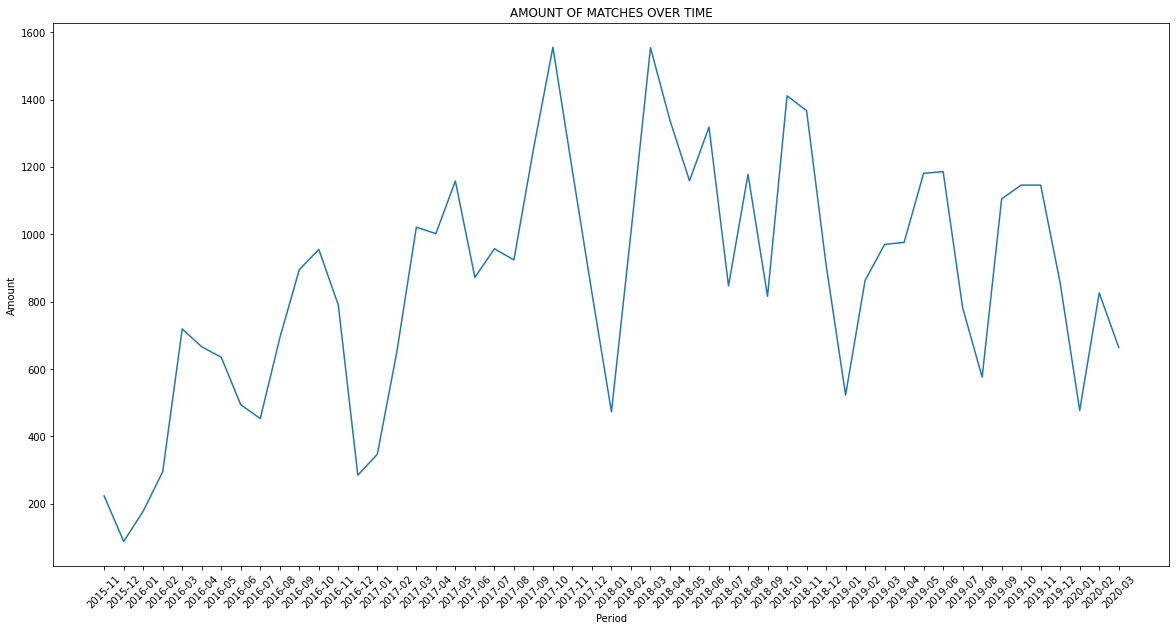

In [ ]:
date = results[['month_year', 'date']].groupby(['month_year']).count().rename(columns={'date': 'qnt'})
date.sort_values(by='month_year',ascending=True,inplace=True)
date.index = date.index.astype(str)
plt.figure(figsize=[20,10])
plt.xticks(rotation=45)
lineplot = sns.lineplot(data=date, x="month_year", y="qnt")
lineplot.set_xlabel("Period")
lineplot.set_ylabel("Amount")
lineplot.set_title("AMOUNT OF MATCHES OVER TIME")

The period covered by the dataset records is from November 2015 to March 2020. In this period it is possible to note that as a standard there is a drop in the number of matches at the end of each year and a tendency to decrease the number of matches at the end of each semester, showing that the championship seasons are semiannual.

# Most played maps

Text(0.5, 1.0, 'MOST PLAYED MAPS')

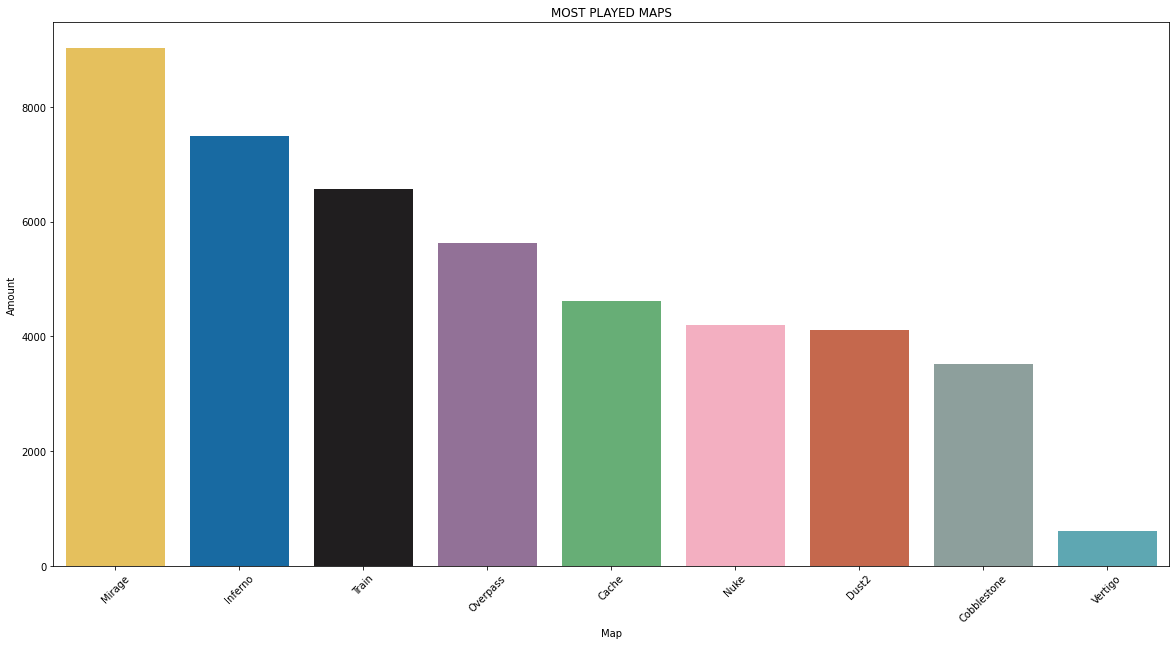

In [ ]:
maps = results[['_map']][results['_map']!="Default"]
maps.reset_index(drop=True, inplace=True)
maps['qnt'] = maps['_map']
maps = maps.groupby(maps['_map']).count()
maps.sort_values('qnt').index
plt.figure(figsize=[20,10])
plt.xticks(rotation=45)
barplot1 = sns.barplot(data=maps, x=maps.index, y="qnt", palette={'Inferno': '#016FB9', 'Mirage': '#FCCA46', 'Train': '#201E1F', 'Overpass': '#966B9D', 'Dust2': '#D95D39', 'Nuke': '#ffa3bc', 'Vertigo': '#50B2C0', 'Cache': '#5BBA6F', 'Cobblestone': '#8AA29E'}, order=maps.sort_values('qnt', ascending=False).index)
barplot1.set_xlabel("Map")
barplot1.set_ylabel("Amount")
barplot1.set_title("MOST PLAYED MAPS")

## Most played maps in the active map pool

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'MOST PLAYED MAPS SINCE AUGUST 2019')

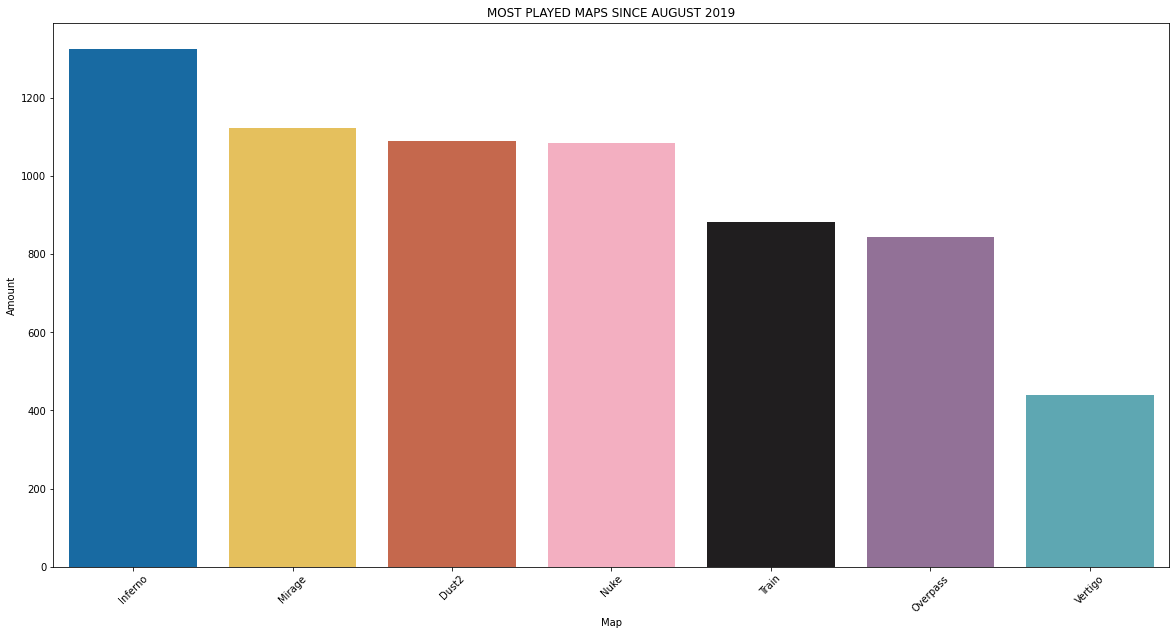

In [ ]:
maps2 = results[['_map']][results['_map']!="Default"][results['date'] > '2019-07-31']
maps2.reset_index(drop=True, inplace=True)
maps2['qnt'] = maps2['_map']
maps2 = maps2.groupby(maps2['_map']).count()
maps2.sort_values('qnt').index
plt.figure(figsize=[20,10])
plt.xticks(rotation=45)
barplot2 = sns.barplot(data=maps2, x=maps2.index, y="qnt", palette={'Inferno': '#016FB9', 'Mirage': '#FCCA46', 'Train': '#201E1F', 'Overpass': '#966B9D', 'Dust2': '#D95D39', 'Nuke': '#ffa3bc', 'Vertigo': '#50B2C0', 'Cache': '#5BBA6F', 'Cobblestone': '#8AA29E'}, order=maps2.sort_values('qnt', ascending=False).index)
barplot2.set_xlabel("Map")
barplot2.set_ylabel("Amount")
barplot2.set_title("MOST PLAYED MAPS SINCE AUGUST 2019")

From the analysis of all time matches in the dataset, we have the statitics of all maps that have been ever present in the map pool of the competitive mode of CS:GO. But, as explained before, this map pool always has only 7 maps, and when some are removed, others are added. Since 2015 only Mirage and Overpass appear in all major championships, without ever having been removed for updating (access: https://liquipedia.net/counterstrike/Portal:Maps for more details of the maps formation in the competitive CS:GO mode). The analysis is then biased by the time that a map was avaliable in the competitive mode of CS:GO, so a new analysis was made with a more recent period selected, in which only the 7 maps currently active in the map pool appear, which are Inferno, Mirage, Overpass, Nuke, Train, Dust2 and Vertigo. This formation is evident in the barplot only when analyzed from August 2019, when Cache was completely removed from the map pool so Vertigo was added.

Finally, this analysis shows that in the most recent scenario of the maps played in the championships, Inferno wins the 'first position', which in the all time analysis belongs to Mirage, as well as Train and Overpass lose some of their popularity among the teams, to Dust2 and Nuke. This is most likely because Inferno, Nuke and Dust2 have had periods outside the pool map since 2015, while Train, Mirage and Overpass have not been removed at any time during this period. And since Vertigo is the most recently added map on CS:GO, it is still unpopular, so it occupies the 'last position'.

# Analysis of the map sides advantage on each map

## Avarege number of rounds per map side

In [ ]:
ct_tr1 = results[['_map', 'ct_1', 't_1']][results['_map']!="Default"].rename(columns={'ct_1': 'ct', 't_1': 'tr', '_map': 'map'})
ct_tr2 = results[['_map', 'ct_2', 't_2']][results['_map']!="Default"].rename(columns={'ct_2': 'ct', 't_2': 'tr', '_map': 'map'})
ct_tr = pd.concat([ct_tr1, ct_tr2], ignore_index=True)

ct_tr.groupby(ct_tr['map']).agg('mean')

,ct,tr
map,,
Cache,6.031541,6.693041
Cobblestone,6.175633,6.452035
Dust2,6.186072,6.586655
Inferno,6.243487,6.470407
Mirage,6.614233,6.152644
Nuke,6.961602,5.718260
Overpass,6.711822,5.988089
Train,6.864682,5.794624
Vertigo,6.206076,6.674877


## Proportion of the total rounds won in each map side

In [ ]:
ct_tr.groupby(ct_tr['map']).agg('sum').apply(lambda x: x/x.sum()*100, axis=1)

,ct,tr
map,,
Cache,47.400700,52.599300
Cobblestone,48.905570,51.094430
Dust2,48.431880,51.568120
Inferno,49.107589,50.892411
Mirage,51.807762,48.192238
Nuke,54.902825,45.097175
Overpass,52.849364,47.150636
Train,54.226369,45.773631
Vertigo,48.180254,51.819746


Both analyses show that on Cache, Cobblestone, Dust2, Inferno and Vertigo there is a tendency to win more rounds on the TR side, while on Mirage, Overpass, Nuke and Train the tendency is to win more rounds as CT.

## Analysis of the influence of starting the map as CT on map winning

This analysis is dedicated to understanding the influence of starting the map as CT on map winning. For that, Pearson's chi-squared test was performed on the data, separated by map, to check if there is a statistically significant difference between winning or losing, categorizing between starting CT ou starting TR for each map.

In [ ]:
map_ct = results[['_map', 'map_winner', 'starting_ct']][results['_map']!="Default"]
map_ct['map_winner'] = map_ct['map_winner'].astype(str)
map_ct['starting_ct'] = map_ct['starting_ct'].astype(str)

map_ct1 = map_ct[['_map','map_winner','starting_ct']]
map_ct1['map_winner'] = map_ct1['map_winner'].str.replace('1', 'win').replace('2', 'lose')
map_ct1['starting_ct'] = map_ct1['starting_ct'].str.replace('1', 'ct').replace('2', 'tr')

map_ct2 = map_ct[['_map','map_winner','starting_ct']]
map_ct2['map_winner'] = map_ct2['map_winner'].str.replace('1', 'lose').replace('2', 'win')
map_ct2['starting_ct'] = map_ct2['starting_ct'].str.replace('1', 'tr').replace('2', 'ct')

map_ct = pd.concat([map_ct1, map_ct2], ignore_index=True)

map_list = map_ct['_map'].unique().tolist()

for map in map_list:
  map_filter = map_ct[['map_winner', 'starting_ct']][map_ct['_map']==map]
  table = pd.crosstab(map_filter['map_winner'], map_filter['starting_ct'])
  chi2 = sp.stats.chi2_contingency(table, correction=True)
  table2 = pd.crosstab(map_filter['map_winner'], map_filter['starting_ct']).apply(lambda r: r/r.sum()*100, axis=1)
  print(f"{map}: {chi2[0:3]}")
  display(table, table2)
  print("_________________________________________________________")

Dust2: (2.4506562955760818, 0.11747574164167571, 1)


starting_ct,ct,tr
map_winner,,
lose,2021,2093
win,2093,2021


starting_ct,ct,tr
map_winner,,
lose,49.124939,50.875061
win,50.875061,49.124939


_________________________________________________________
Inferno: (15.648363393453574, 7.62785643551e-05, 1)


starting_ct,ct,tr
map_winner,,
lose,3621,3864
win,3864,3621


starting_ct,ct,tr
map_winner,,
lose,48.376754,51.623246
win,51.623246,48.376754


_________________________________________________________
Vertigo: (0.3284072249589491, 0.5665984802832496, 1)


starting_ct,ct,tr
map_winner,,
lose,299,310
win,310,299


starting_ct,ct,tr
map_winner,,
lose,49.09688,50.90312
win,50.90312,49.09688


_________________________________________________________
Overpass: (0.9614222222222222, 0.3268288098731137, 1)


starting_ct,ct,tr
map_winner,,
lose,2839,2786
win,2786,2839


starting_ct,ct,tr
map_winner,,
lose,50.471111,49.528889
win,49.528889,50.471111


_________________________________________________________
Nuke: (0.20970042796005706, 0.6470023068475628, 1)


starting_ct,ct,tr
map_winner,,
lose,2092,2114
win,2114,2092


starting_ct,ct,tr
map_winner,,
lose,49.738469,50.261531
win,50.261531,49.738469


_________________________________________________________
Mirage: (4.856224365369693, 0.027546556104350566, 1)


starting_ct,ct,tr
map_winner,,
lose,4436,4585
win,4585,4436


starting_ct,ct,tr
map_winner,,
lose,49.174149,50.825851
win,50.825851,49.174149


_________________________________________________________
Train: (0.007614986293024673, 0.9304617570300802, 1)


starting_ct,ct,tr
map_winner,,
lose,3286,3280
win,3280,3286


starting_ct,ct,tr
map_winner,,
lose,50.04569,49.95431
win,49.95431,50.04569


_________________________________________________________
Cache: (5.05701278994147, 0.02452647801091676, 1)


starting_ct,ct,tr
map_winner,,
lose,2252,2361
win,2361,2252


starting_ct,ct,tr
map_winner,,
lose,48.818556,51.181444
win,51.181444,48.818556


_________________________________________________________
Cobblestone: (11.479647025334472, 0.0007036249208245267, 1)


starting_ct,ct,tr
map_winner,,
lose,1685,1828
win,1828,1685


starting_ct,ct,tr
map_winner,,
lose,47.964703,52.035297
win,52.035297,47.964703


_________________________________________________________


The results show us that in the maps **Inferno, Mirage, Cache and Cobblestone** there is a statistically significant difference between starting as CT and starting as TR to have a tendency to win, indicating that it is more recommended to start as a CT to win.


# Analysis of the performance of the teams

Here the teams were classified according to a score attributed to them through a calculation that considers the number of wins, average rounds per map and rate of wins in relation to the total of maps played by that team. The table shows the 10 "best" teams considering these items, in order.


In [ ]:
team1 = results[['team_1', 'result_1', 'map_winner']].rename(columns={'team_1': 'team', 'result_1': 'result'})
team2 = results[['team_2', 'result_2', 'map_winner']].rename(columns={'team_2': 'team', 'result_2': 'result'})
team1['map_winner'] = team1['map_winner'].astype(str)
team1['map_winner'] = team1['map_winner'].str.replace('1', 'win').str.replace('2', 'lose')
team2['map_winner'] = team2['map_winner'].astype(str)
team2['map_winner'] = team2['map_winner'].str.replace('2', 'win').str.replace('1', 'lose')
team = pd.concat([team1, team2], ignore_index=True)

win = team[team['map_winner']=='win']
win = win[['map_winner']].groupby(win['team']).agg('count')

countmean = team[['result']].groupby(team['team']).agg(['count', 'mean'])
countmean = countmean['result'].sort_values('mean', ascending=False)

win2 = countmean.merge(win, on='team' , how='left')
win2['map_winner'] = win2['map_winner'].fillna(value=0)
win2.rename(columns={'map_winner': 'win'}, inplace=True)
win2['win_rate'] = win2['win']/win2['count']
win2['win_score'] = win2['win']/win2['win'].max()
win2['mean_score'] = win2['mean']/win2['mean'].max()
win2['score'] = (win2['mean_score']*0.1)+(win2['win_score']*0.5)+(win2['win_rate']*0.4)

win2.sort_values('score', ascending=False).head(10)

,count,mean,win,win_rate,win_score,mean_score,score
team,,,,,,,
Astralis,872,14.649083,596.0,0.683486,0.993333,0.665867,0.836648
Liquid,1004,13.939243,600.0,0.597610,1.000000,0.633602,0.802404
TYLOO,819,14.279609,533.0,0.650794,0.888333,0.649073,0.769391
mousesports,947,13.810982,545.0,0.575502,0.908333,0.627772,0.747144
Tricked,970,13.473196,538.0,0.554639,0.896667,0.612418,0.731431
G2,923,13.758397,519.0,0.562297,0.865000,0.625382,0.719957
FaZe,892,13.863229,512.0,0.573991,0.853333,0.630147,0.719278
Cloud9,871,13.715270,507.0,0.582090,0.845000,0.623421,0.717678
fnatic,878,13.756264,504.0,0.574032,0.840000,0.625285,0.712141


The teams on the top of the ranking had their number of victories in championships greatly influencing their positions by analyzing their constant winning participation in professional championships as a favorable point for the ranking, followed by their victory rate and average rounds won per map.

## Analysis of the overall scenario of the teams

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF THE AMOUNT OF MAPS PLAYED BY EACH TEAM')

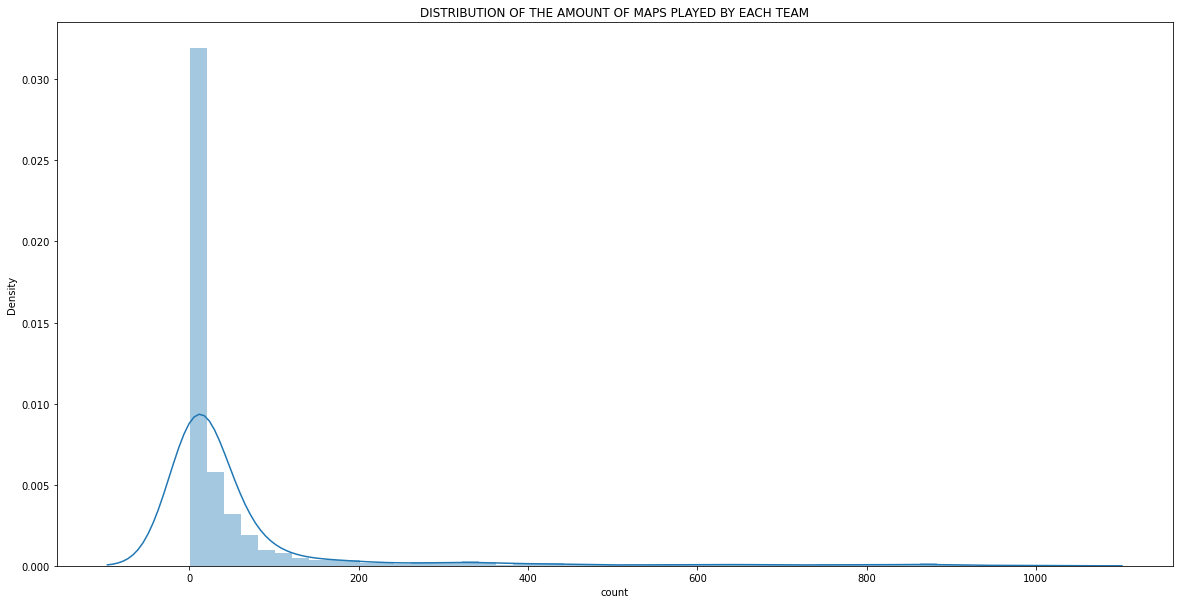

In [ ]:
plt.figure(figsize=[20,10])
dist1 = sns.distplot(win2['count'])
dist1.set_title("DISTRIBUTION OF THE AMOUNT OF MAPS PLAYED BY EACH TEAM")

Text(0.5, 1.0, 'DISTRIBUTION OF THE AMOUNT OF MAPS PLAYED BY EACH TEAM')

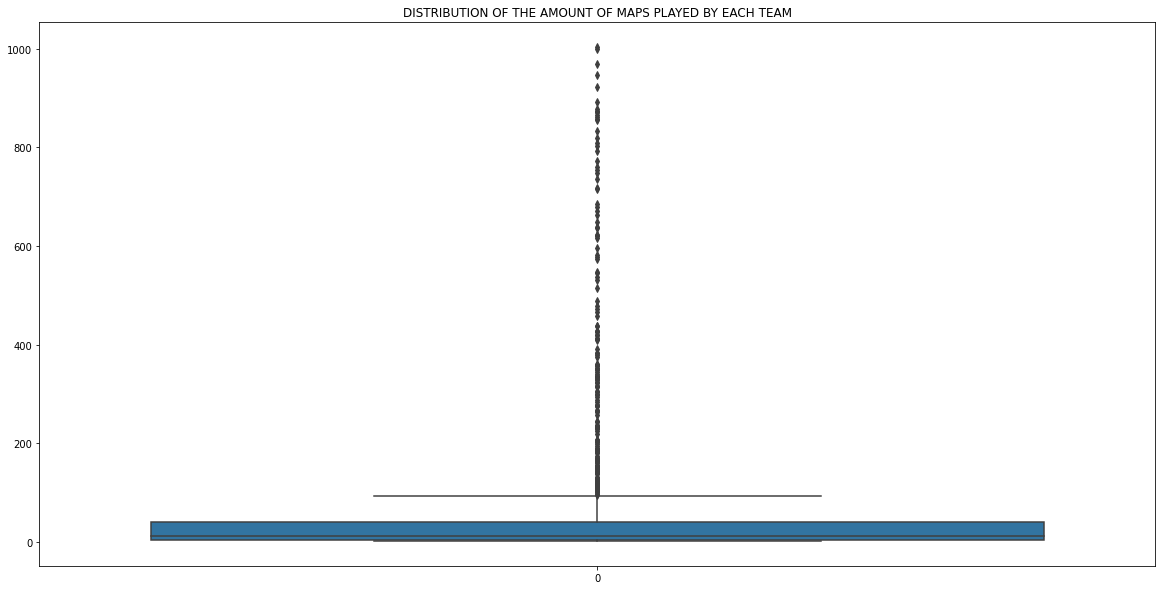

In [ ]:
plt.figure(figsize=[20,10])
box1 = sns.boxplot(data=win2['count'])
box1.set_title("DISTRIBUTION OF THE AMOUNT OF MAPS PLAYED BY EACH TEAM")

Analyzing the distribution of the number of maps played by each team in the dataset, it is concluded that the vast majority of these teams only played less than 100 maps, and those that played more than that, that is, the major teams participating in more championships, present in the majors, are outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF THE MEAN OF ROUNDS WON IN EACH MAP BY EACH TEAM')

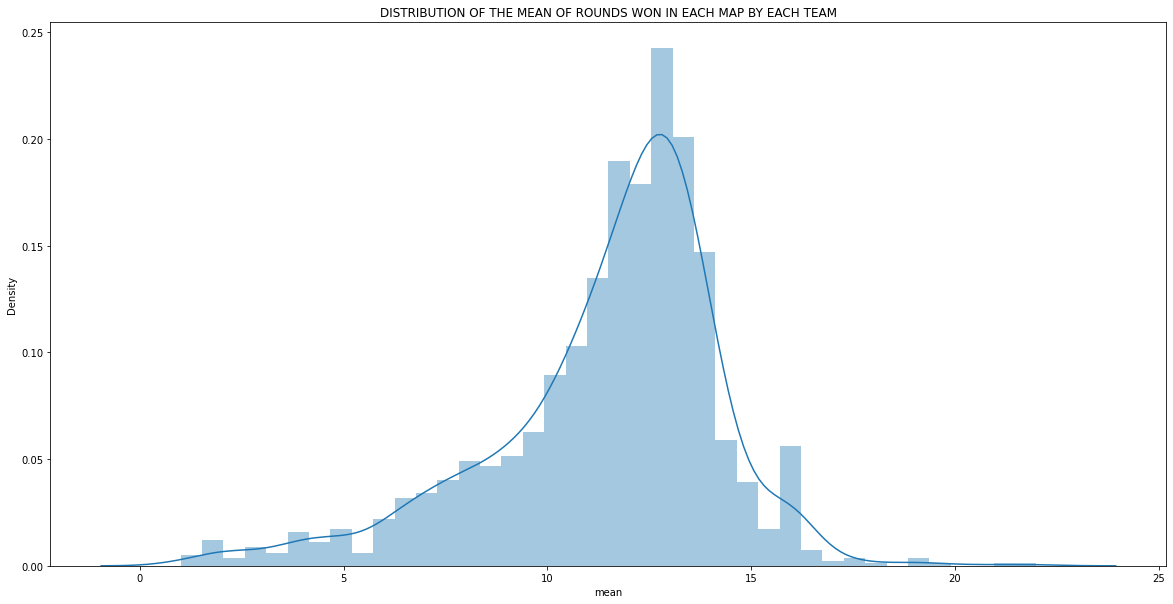

In [ ]:
plt.figure(figsize=[20,10])
dist2 = sns.distplot(win2['mean'])
dist2.set_title("DISTRIBUTION OF THE MEAN OF ROUNDS WON IN EACH MAP BY EACH TEAM")

Text(0.5, 1.0, 'DISTRIBUTION OF THE MEAN OF ROUNDS WON IN EACH MAP BY EACH TEAM')

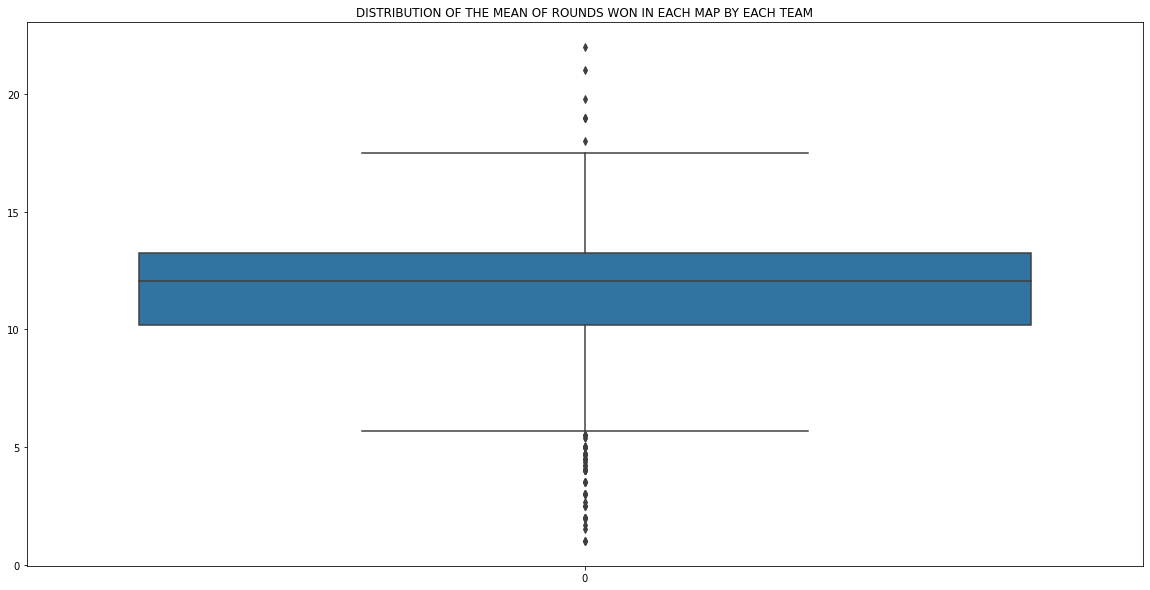

In [ ]:
plt.figure(figsize=[20,10])
box2 = sns.boxplot(data=win2['mean'])
box2.set_title("DISTRIBUTION OF THE MEAN OF ROUNDS WON IN EACH MAP BY EACH TEAM")

As expected, when analyzing the average rounds per map for each team, the standard is to maintain an average between 10 and 14 rounds.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF THE WIN RATE OF MAPS PLAYED BY EACH TEAM')

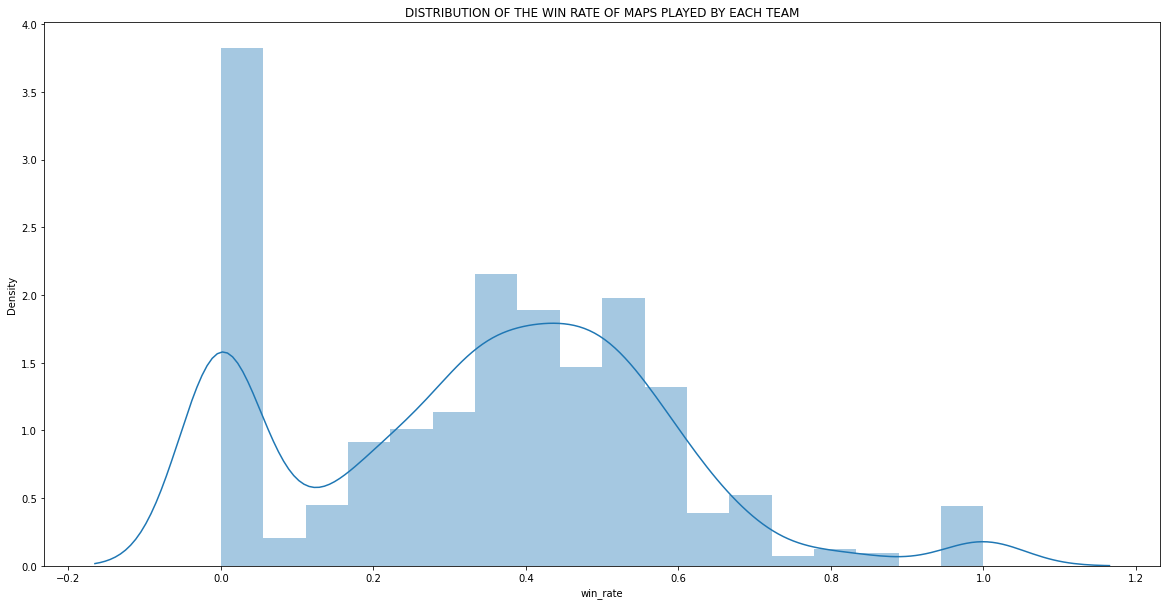

In [ ]:
plt.figure(figsize=[20,10])
dist3 = sns.distplot(win2['win_rate'])
dist3.set_title("DISTRIBUTION OF THE WIN RATE OF MAPS PLAYED BY EACH TEAM")

Text(0.5, 1.0, 'DISTRIBUTION OF THE WIN RATE OF MAPS PLAYED BY EACH TEAM')

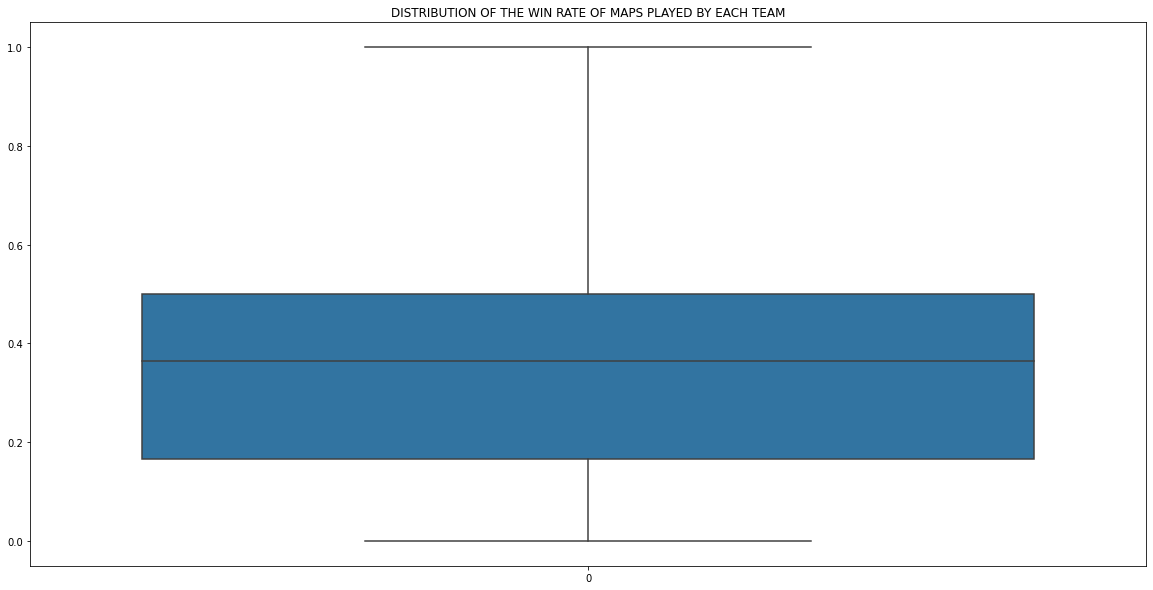

In [ ]:
plt.figure(figsize=[20,10])
box3 = sns.boxplot(data=win2['win_rate'])
box3.set_title("DISTRIBUTION OF THE WIN RATE OF MAPS PLAYED BY EACH TEAM")

There is a considerable number of teams with a win rate of 0 or 1 (0% or 100%), due to the teams that have played only once or only a few times, which, as previously seen, represent a large number of teams, reaching a consistency of 100% of the results in victory or defeat. Disregarding these teams, the vast majority keeps the win rate between 15% and 50%.